# Aula 01 - Introdução ao R

Material adaptado do original em inglês disponível em https://gupsych.github.io/data_skills/01_intro.html

## 1.1. Objetivos

Ao final da aula o aluno deverá aprender a:

* Trabalhar com o console R ou com o kernel da Linguagem R para os notebooks do jupyter;
* Aprender a executar comandos básicos na linguagem R:
    * Operações matemáticas;
    * Utilização de variáveis;
    * Sintaxe básica e funções.
* Instalar e utilizar pacotes;
* Criar e estruturar um script em R.

## 1.2. Recursos

* Para melhor aproveitamento da aula recomenda-se a leitura prévia do [Capítulo 1: Introdução](https://r4ds.had.co.nz/introduction.html) do Livro _R for Data Science_

## 1.3. O que é a linguagem R?

Surgida comou uma extensão da [Linguagem S](https://en.wikipedia.org/wiki/S_(programming_language)) desenvolvida nos laboratórios Bell dos Estados Unidos, a linguagem R tem como foco a estatística, seja na construção de gráfico ou no cálculo computacional. Algumas características da linguagem:

* Software Livre;
* Comunidade bastante atuante (CRAN);
* Evolução contínua;
* Reprodutibilidade dos resultados das pesquisas (Metodologia Científica).

### 1.3.1. Console básico

O ambiente de execução elementar da linguagem R (_Base R_) consiste no seu interpretador, que é do tipo _Read Evaluate Print Loop_ (REPL). Nesse tipo de ambiente os resultados dos comandos são apresentados logo após a execução. 

A Figura abaixo apresenta um terminal básico de R com suas entradas e saídas:

![Imagem de um terminal básico de R](images/r-console.png "Console R")

### 1.3.2. Jupyter notebook

Essa aula e as próximas utilizarão o ambiente de execução do R para Jupyter notebook. Caso queira configurar seu ambiente, é possível encontrar instruções de como habilitar o [kernel do R (IRKernel) no Jupyter notebook](https://irkernel.github.io/installation/).

In [1]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

## 1.4. Executando comandos

Vamos começar os exercícios aprendendo como interagir com o terminal e com o jupyter notebook.  É possível imaginar o terminal como um ambiente de testes para comandos elementares, que depois poderão ser reaproveitados na construção do script completo. Um notebook terá, idealmente, um resultado completo, como será abordado mais a frente no curso.

### 1.4.1. Utilizando o R como uma calculadora elementar

Vamos começar os exercícios realizando algumas operações aritméticas simples.

In [2]:
## REPL: Read/Evaluate/Print Loop
## R prints results back at you
1 + 1

[1] 2

É possível quebrar expressões matemáticas em múltiplas linhas; o R sempre espera uma expressão completa antes do processamento.

In [3]:
## here comes a long expression
## let's break it over multiple lines
1 + 2 + 3 + 4 + 5 + 6 +
    7 + 8 + 9 +
    10

[1] 55

Textos entre parênteses são chamados de strings

In [4]:
"Good afternoon"

[1] "Good afternoon"

É possível quebrar um texto entre múltiplas linhas; R espera uma outra aspa dupla antes de processar a expressão. Se quiser utilizar uma aspa dupla entre parênteses utiliza a contrabarra.

In [5]:
africa <- "I hear the drums echoing tonight  
But she hears only whispers of some quiet conversation  
She's coming in, 12:30 flight  
The moonlit wings reflect the stars that guide me towards salvation  
I stopped an old man along the way  
Hoping to find some old forgotten words or ancient melodies  
He turned to me as if to say, \"Hurry boy, it's waiting there for you\"

- Toto"

cat(africa) # cat() prints the string

I hear the drums echoing tonight  
But she hears only whispers of some quiet conversation  
She's coming in, 12:30 flight  
The moonlit wings reflect the stars that guide me towards salvation  
I stopped an old man along the way  
Hoping to find some old forgotten words or ancient melodies  
He turned to me as if to say, "Hurry boy, it's waiting there for you"

- Toto

Os comentários utilizam o símbolo _#_ e podem estar no começo ou no meio da linha.

In [6]:
## comments: any text from '#' on is ignored until end of line
22 / 7  # approximation to pi

[1] 3.142857

### 1.4.2. Variáveis

Para armazenar os resultados das operações é possível a utilização de variáveis. Algumas considerações importantes quando estiver dando nome às variáveis:

* Letras maiúsculas e minúsculas importam (`myvar` é uma variável diferente de `myVar`);
* Não utilize espaços ou caracteres especiais `(^&"'*+?)`; sempre que quiser representar um espaço utiliza o símbolo `_` (`my_var` é um nome válido para a variável);
* Deve começar com letras (`m2` é um nome válido, mas `2m` não é).

Utilize o operador de atribuição `<-` para atribuir o valor à direita para a variável à esquerda.

In [7]:
## use the assignment operator '<-'
## R stores the number in the variable
x <- 5

Agora que armazenamos um valor na variável `x` é possível utilizá-la.

In [8]:
x * 2

[1] 10

In [9]:
## R evaluates the expression and stores the result in the variable
boring_calculation <- 2 + 2

Note que o resultado não é impresso, já que está armazenado em uma variável. Para ver o resultado, simplesmente digite seu nome:

In [10]:
boring_calculation

[1] 4

Uma vez que um valor é atribuído à variável, só será alterado se houver uma nova atribuição, ainda que a operação tenha sido um resultado combinado de outras variáveis.

In [11]:
this_year <- 2019
my_birth_year <- 1976
my_age <- this_year - my_birth_year
this_year <- 2020

this_year
my_age

[1] 2020

[1] 43

### 1.4.3. Ambiente

Sempre que atribuir um valor à uma nova variável, o R cria um novo objeto no ambiente global. Os objetos definidos no escopo global existem somente até o final da sessão; contudo, quando a sessão for finalizada, eles desaprecem para sempre.

In [12]:
ls()            # print the variables in the global environment
rm("x")         # remove the variable named x from the global environment
rm(list = ls()) # clear out the global environment

[1] "africa"             "boring_calculation" "home"              
[4] "lib_dir"            "my_age"             "my_birth_year"     
[7] "this_year"          "x"

In [13]:
x

ERROR: Error in eval(expr, envir, enclos): objeto 'x' não encontrado


### 1.4.4. Espaços em branco

o comando só é finalizado quando a expressão for concluída

In [14]:
# R waits until next line for evaluation
(3 + 2) *
     5

[1] 25

Também pode ser útil quebrar funções muito longas em muitas linhas.

In [15]:
cat("3, 6, 9, the goose drank wine",
    "The monkey chewed tobacco on the streetcar line",
    "The line broke, the monkey got choked",
    "And they all went to heaven in a little rowboat",
    sep = "  \n")

3, 6, 9, the goose drank wine  
The monkey chewed tobacco on the streetcar line  
The line broke, the monkey got choked  
And they all went to heaven in a little rowboat


In [16]:
# often useful to spread function arguments over multiple lines
install.packages("cowsay")
library(cowsay)
say("This function call is far too wide to fit all on one line",
    "stretchycat")

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)


 -------------- 
This function call is far too wide to fit all on one line 
 --------------
    \
      \
        \
                        ,/|         _.--‛‛^``-...___.._.,;
                      /, \‛.     _-‛          ,--,,,--‛‛‛
                     {  \    `_-‛‛       ‛    /}‛
Jill                    `;;‛             ;   ; ;
                  ._.--‛‛     ._,,, _..‛  .;.‛
                  (,_....----‛‛‛     (,..--‛‛
  



### 1.4.5. Sintaxe das funções

A principal utilização da linguagem R é chamar uma função para armazenar os resultados. Uma função é um trecho de código reutilizável. Um exemplo é a função `sd` que retorna o desvio padrão para um vetor de números fornecido como entrada. Ex.:

`function_name(argument1, argument2 = "value")`

Os parâmetros em parânteses podem ser nomeados (como `argument1 = 10`) ou seus nomem podem ser ignorados, obedecendo a ordem em que são definidos. 

Para conhecer os parâmetros da função é possível utilizar o operador `?`.

In [17]:
?sd

As funções podem tanto retornar valores como imprimir resultados diretamente para a saída. Como exemplo utilizaremos a função `rnorm` que gera um conjunto de números para a distribuição normal padrão. Se buscarmos os parâmetros da função (`?rnorm`), encontraremos as seguintes definições:

`rnorm(n, mean = 0, sd = 1)`

onde `n` é a quantidade de números aleatórios a serem gerados, `mean` é a média da distribuição normal e `sd` seu desvio padrão. Observe, na definição, que o parâmetro `n` é obrigatório:

In [18]:
rnorm()

ERROR: Error in rnorm(): argumento "n" ausente, sem padrão


O seguinte exemplo gera 10 números para uma distribuição normal com desvio padrão igual a 0:

In [19]:
rnorm(10)

[1] -0.03598879  0.07964828  0.09196603  1.78907212  0.32499453 -0.27355441
 [7] -0.30755948 -0.16481570  1.11765645  1.14124960

Agora aumentamos a média para 100

In [20]:
rnorm(10, 100)

[1]  99.50431 101.06812  98.53315 100.71826 100.58688  98.89131 100.67794
 [8]  99.10140  99.09952 100.19299

Fornecer o nome dos parâmetros de entrada deve produzir o mesmo resultado

In [21]:
rnorm(n = 10, mean = 100)

[1]  99.70712  99.35305  99.70102 100.43940  99.86997  98.07313  98.59243
 [8] 101.51657 100.74821  98.68945

Não é necessário fornecer o nome dos parâmetros porque serão processados em ordem. Contudo, é possível chamar utilizando diferentes atributos de ordem utilizando o nome dos parâmetros:

In [22]:
rnorm(10, sd = 100)

[1] -209.79113   97.62033   67.75537  -27.46889  -84.13995   35.59169
 [7]  193.95874   31.11234  -34.37207 -178.27371

Algumas funções apresentam uma lista de opções depois de um parâmetro; isso significa que o primeiro valor é o padrão. Um bom exemplo é a função `power.t.test()`

In [23]:
?power.t.test()

### 1.4.6. Ajuda

É possível iniciar o módulo de ajuda utilizando a chamada `help.start()`.

In [24]:
help.start()

starting httpd help server ...
 done



If the browser launched by 'xdg-open' is already running, it is *not*
    restarted, and you must switch to its window.
Otherwise, be patient ...


Contudo, ao utilizar o jupyter notebook, a utilização do operador `?` abre a ajuda como uma nova tela no navegador, sendo a forma recomendada de obter ajuda.

## 1.5. Pacotes

Uma das maiores virtudes da linguagem R é a **facilidade de extensão** das ferramentas por parte dos usuários. Existem milhares de pacotes no repositório oficial da comunidade que resolvem diferentes classes de problema, ou apenas apresentam dados e análises já compiladas para facilitar a reprodução.

Tais pacotes não fazem parte da distribuição padrão, e precisam ser baixados antes de utilizados. O principal repositório de aplicações se chama [CRAN](https://cran.r-project.org/). Antes de um pacote ser enviado para sua base, precisa passar por uma bateria de testes de forma a garantir sua qualidade e segurança. Ao utilizar o comando `install.packages()` os pacotes serão baixados diretamento do espelho do repositório.

É importante observar que existe uma grande diferença entre **baixar** e **carregar** um pacote no script.

### 1.5.1. Instalando um pacote

Ao utilizar o comando `install.packages` o pacote está sendo baixado do espelho para a máquina local, de forma a poder utilizá-lo posteriormente nos scripts. 

O seguinte trecho de código foi apresentado no começo da aula:

In [25]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

Esse comando permite que os pacotes sejam baixados no diretório do usuário, uma vez que não termos permissão para baixar na distribuição R instalada no sistema operacional. Também é necessário que seja carregado logo no começo do notebook, de forma a permitir que os pacotes instalados no diretório local sejam vistos pelos scripts. Todos os notebooks serão iniciados com esses comandos.

Agora é possível instalar um pacote:

In [26]:
install.packages('ggExtra')

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)



### 1.5.2. Carregando um pacote

A utilização do comando `library(packagename)` carrega o pacote para utilização no programa. Como se trata de carregar uma função, o comando deve estar presente em todas as execuções do script, diferente do comando `install`, quebaixa o pacote para utilização posterior.

O seguinte exemplo carrega uma biblioteca e executa um exemplo elementar:

In [28]:
library(ggExtra)

#ggExtra::runExample()

### 1.5.3. Instalando do github

Muitos pacotes ainda não chegaram ao CRAN por ainda estarem em desenvolvimento. Também é possível que _datasets_ e exemplos de código apresentados como resultados de pesquisa estejam disponíveis no github. Com a utilização do pacote `devtools` é possível baixar pacotes diretamente do github, assim como _datasets_ , para utilização nos scripts:

In [29]:
install.packages("devtools")
devtools::install_github("adam-gruer/goodshirt")

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ini’, ‘clisymbols’, ‘gh’, ‘rprojroot’, ‘rex’, ‘crosstalk’, ‘xopen’, ‘brew’, ‘commonmark’, ‘praise’, ‘usethis’, ‘covr’, ‘desc’, ‘DT’, ‘git2r’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘rversions’, ‘sessioninfo’, ‘testthat’






✔  checking for file ‘/tmp/RtmpCcxBXl/remotes27645dbd0c6e/adam-gruer-goodshirt-7253105/DESCRIPTION’
─  preparing ‘goodshirt’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘goodshirt_0.2.2.tar.gz’
   


Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)



Depois de baixar o pacote do github é possível utilizar alguns dos exemplos fornecidos pelo autor para testar a funcionalidade.

In [30]:
library(goodshirt)
# quotes from The Good Place
chidi()
eleanor()
tahani()
jason()


 You know, I thought I'd have a stomachache right now, but weirdly... I do. 

 ~ Chidi


  "We're running out of time and I'm your only option?" A lot of guys your age said that to me just as the bar was about to close. But I never settled for them. Because my ex-boyfriend lived nearby, he was obsessed with me and he never slept because he was addicted to Adderall. There is always another option. 

 ~ Eleanor


 I understand nothing. 

 ~ Tahani


 Here's the thing. I'm nice to you, and you're mean to me. There's something wrong about that, but I can't put my finger on what it is. 

 ~ Jason

## 1.6. Organizando um projeto

Os projetos são um conjunto de arquivos que compõem a análise. Muitos projetos são compostos de scripts, arquivos de dados, PDF com resultado das análise, etc.

### 1.6.1. Desenvolvendo scripts reproduzíveis

A linguagem R permite o desenvolvimento de scripts reproduzíveis. A seguir é possível ver um exemplo, que configura seu ambiente com as dependências obrigatórias e apresenta script elementar.


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



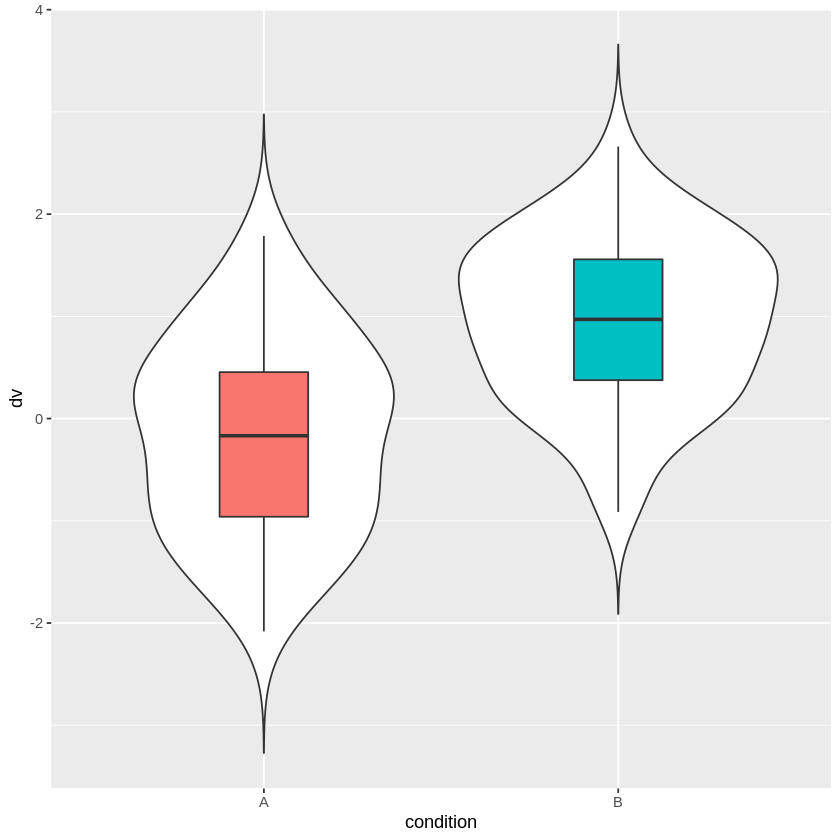

In [31]:
# load add-on packages
library(tidyverse)

# set variables ----
n <- 100

# simulate data ----
data <- data.frame(
  id = 1:n,
  dv = c(rnorm(n/2, 0), rnorm(n/2, 1)),
  condition = rep(c("A", "B"), each = n/2)
)

# plot data ----
ggplot(data, aes(condition, dv)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.25, 
               aes(fill = condition),
               show.legend = FALSE)

# save plot ----
dir.create("output", showWarnings = FALSE)
ggsave("output/sim_data.png", width = 8, height = 6)

Ao construir seus scripts, é recomendado que seja seguida a mesma estrutura:

1. Carregar os pacotes/dependências necessários para sua execução;
2. Definir as funções do usuário;
3. Carregar os dados que serão utilizados;
4. Trabalhar com os dados;
5. Salvar tudo o que precisa ser salvo.

### 1.6.2. Análises completas utilizando Jupyter Notebook

Os princípios de desenvolvimento de software que norteiam os processos aplicados às outras linguagens também se aplicam aos projetos executados em R. Contudo, como visto na introdução, trata-se de uma linguagem que tem como principal objetivo executar análises estatísticas. Agora é importante retomar o ciclo de análise utilizado em ciência de dados e apresentado no livro-texto da disciplina, _R for Data Science_ 

![Ciclo de Ciência de Dados](images/data-science.png "Projetos de Data Science")

Ainda que a literatura apresente variações, uma etapa fundamental envolve a aprendizagem sobre os dados. Normalmente utiliza-se um conjunto reduzido das informações para saber se os objetivos de negócio podem ser atendidos a partir dos conjuntos de dados que estão disponíveis para a análise.

Nesse contexto, a utilização dos notebooks pode auxiliar o cientista de dados, no sentido de conter todos os elementos que levaram ao entendimento dos dados para o negócio. Todas as entradas, saídas, gráficos produzidos e conclusões devem ser passíveis de reprodução, e sua verificabilidade é facilitada com a utilização dos notebooks. Como boa prática então sugere-se que o notebook seja completo e auto-contido, permitindo a repetição do experimento nas mesmas condições.

Os próximos laboratórios terão como foco a construção de notebooks para responder perguntas de negócio.